### **1. Importing Libraries**

In [400]:
import pandas as pd                                                 # Importing for panel data analysis
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface of matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#--------------------~-----------------------------------------------------------------------------------------------------------
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
#--------------------~-----------------------------------------------------------------------------------------------------------
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN 
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#--------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

### **2. Data Preprocessing**
- Here we try to understand our data and preprocess it to the desirable format.
- All the observations are written in bullet points in markdown.

In [341]:
# Import training data into pandas dataframe
compact_df = pd.read_csv('./Dataset/Dataset2/Compact.csv')
print('Shape of the dataset:', compact_df.shape)
compact_df.head(3)

Shape of the dataset: (400, 2)


,x1,x2
0,-50.298667,31.489949
1,-45.591237,35.838229
2,-52.628892,35.305813


In [342]:
compact_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      400 non-null    float64
 1   x2      400 non-null    float64
dtypes: float64(2)
memory usage: 6.4 KB


In [343]:
# get statistics for all columns
compact_df.describe().loc[['min', 'max', 'mean', 'std']].round(2)

,x1,x2
min,-54.45,-33.99
max,29.89,40.37
mean,-11.68,6.17
std,28.59,25.73


----

In [344]:
# Import training data into pandas dataframe
skewed_df = pd.read_csv('./Dataset/Dataset2/Skewed.csv')
print('Shape of the dataset:', skewed_df.shape)
skewed_df.head(3)

Shape of the dataset: (925, 2)


,x1,x2
0,-0.450040,11.207204
1,-1.065648,-1.923373
2,0.829499,-1.000498


In [345]:
skewed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      925 non-null    float64
 1   x2      925 non-null    float64
dtypes: float64(2)
memory usage: 14.6 KB


In [346]:
# get statistics for all columns
skewed_df.describe().loc[['min', 'max', 'mean', 'std']].round(2)

,x1,x2
min,-14.79,-15.93
max,13.84,25.95
mean,-0.18,2.75
std,5.17,7.68


----

In [347]:
# Import training data into pandas dataframe
subclusters_df = pd.read_csv('./Dataset/Dataset2/Subclusters.csv')
print('Shape of the dataset:', subclusters_df.shape)
subclusters_df.head(3)

Shape of the dataset: (400, 2)


,x1,x2
0,-14.952995,-0.285601
1,-17.406881,3.495200
2,-14.122142,0.712242


In [348]:
subclusters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      400 non-null    float64
 1   x2      400 non-null    float64
dtypes: float64(2)
memory usage: 6.4 KB


In [349]:
# get statistics for all columns
subclusters_df.describe().loc[['min', 'max', 'mean', 'std']].round(2)

,x1,x2
min,-20.98,-12.28
max,30.20,17.46
mean,4.86,3.04
std,17.32,8.97


----

In [350]:
# Import training data into pandas dataframe
wellSeparated_df = pd.read_csv('./Dataset/Dataset2/wellSeperated.csv')
print('Shape of the dataset:', wellSeparated_df.shape)
wellSeparated_df.head(3)

Shape of the dataset: (335, 2)


,x1,x2
0,516.012706,393.014514
1,436.211762,408.656585
2,512.052601,372.022014


In [351]:
wellSeparated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      335 non-null    float64
 1   x2      335 non-null    float64
dtypes: float64(2)
memory usage: 5.4 KB


In [352]:
# get statistics for all columns
wellSeparated_df.describe().loc[['min', 'max', 'mean', 'std']].round(2)

,x1,x2
min,416.82,201.33
max,698.54,472.04
mean,576.77,349.08
std,78.85,68.32


----

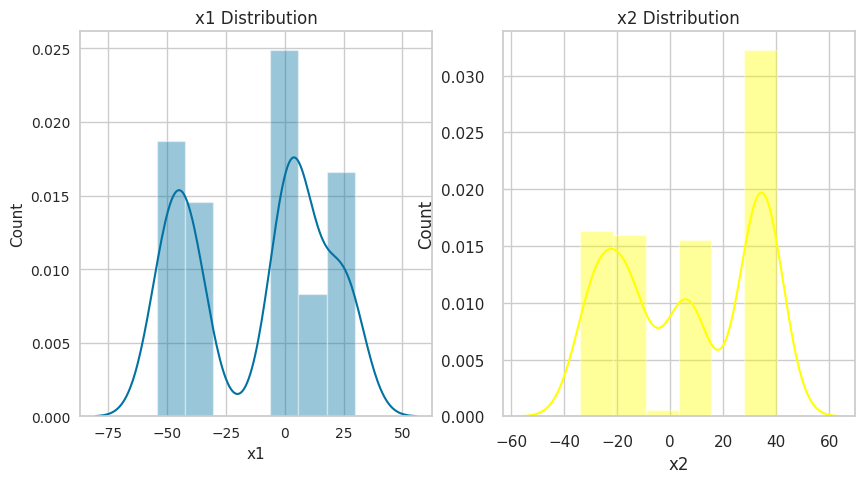

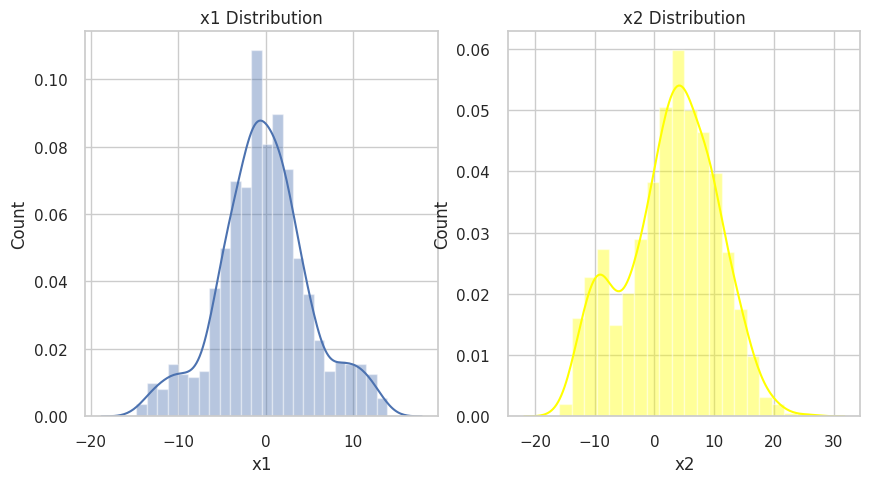

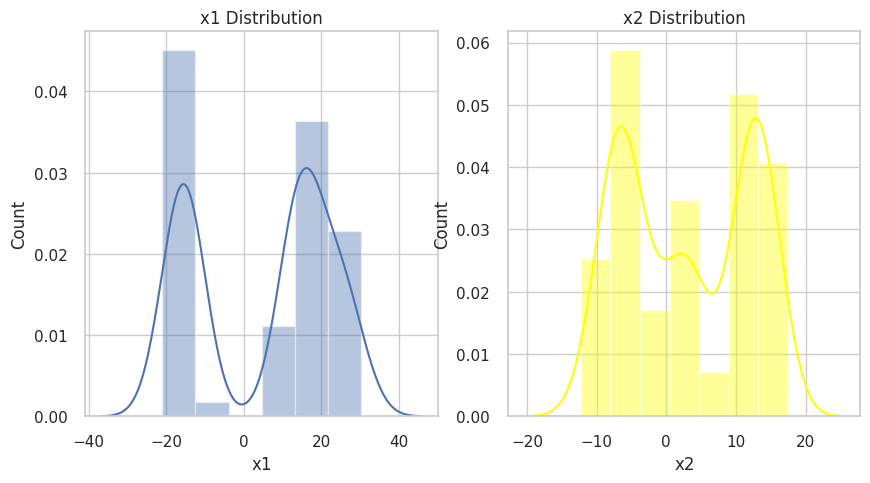

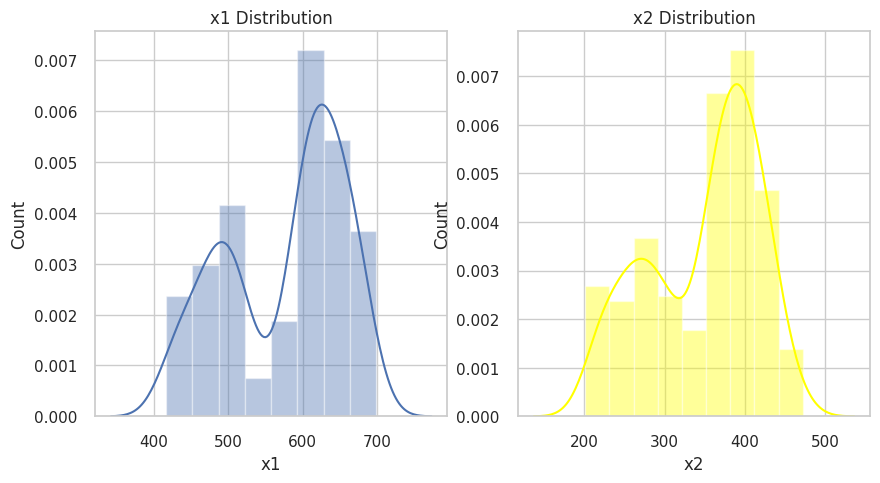

In [353]:
def dist(dataframe):
    plt.rcParams['figure.figsize'] = (10, 5)

    plt.subplot(1, 2, 1)
    sns.set(style = 'whitegrid')
    sns.distplot(dataframe['x1'])
    plt.title('x1 Distribution', fontsize = 12)
    plt.xlabel('x1')
    plt.ylabel('Count')


    plt.subplot(1, 2, 2)
    sns.set(style = 'whitegrid')
    sns.distplot(dataframe['x2'], color = 'yellow')
    plt.title('x2 Distribution', fontsize = 12)
    plt.xlabel('x2')
    plt.ylabel('Count')
    plt.show()

df_list = [compact_df ,skewed_df, subclusters_df, wellSeparated_df]
for dataframe in df_list:
    dist(dataframe)

----

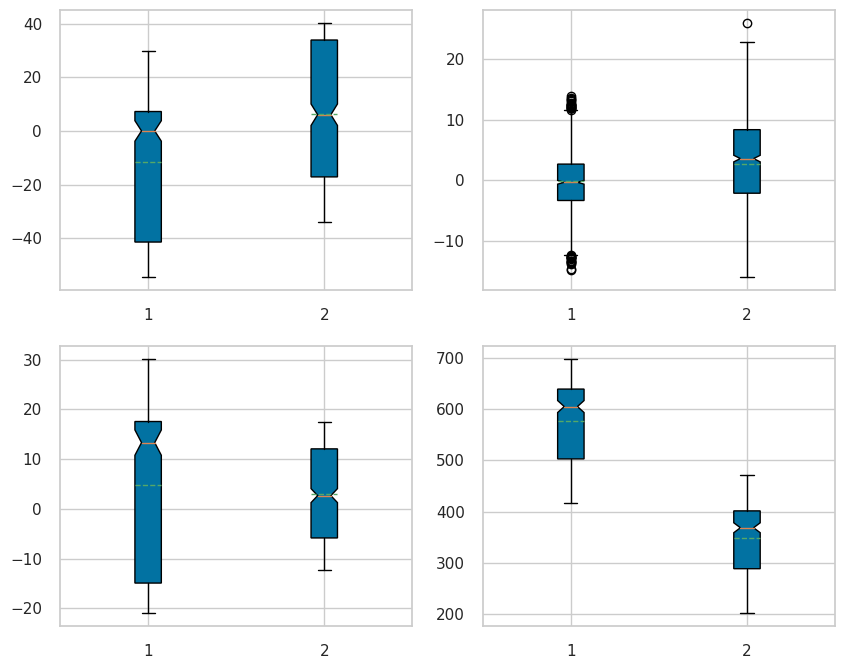

In [354]:
df_list = [compact_df , skewed_df, subclusters_df, wellSeparated_df]

columns = [[compact_df["x1"], compact_df['x2']], [skewed_df["x1"], skewed_df['x2']], [subclusters_df["x1"], subclusters_df['x2']], [wellSeparated_df["x1"], wellSeparated_df['x2']]]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

count=0
for row in ax:
    for col in row:
        col.boxplot(columns[count], notch=True, patch_artist=True, meanline=True, showmeans=True)
        count+=1
plt.show()

----

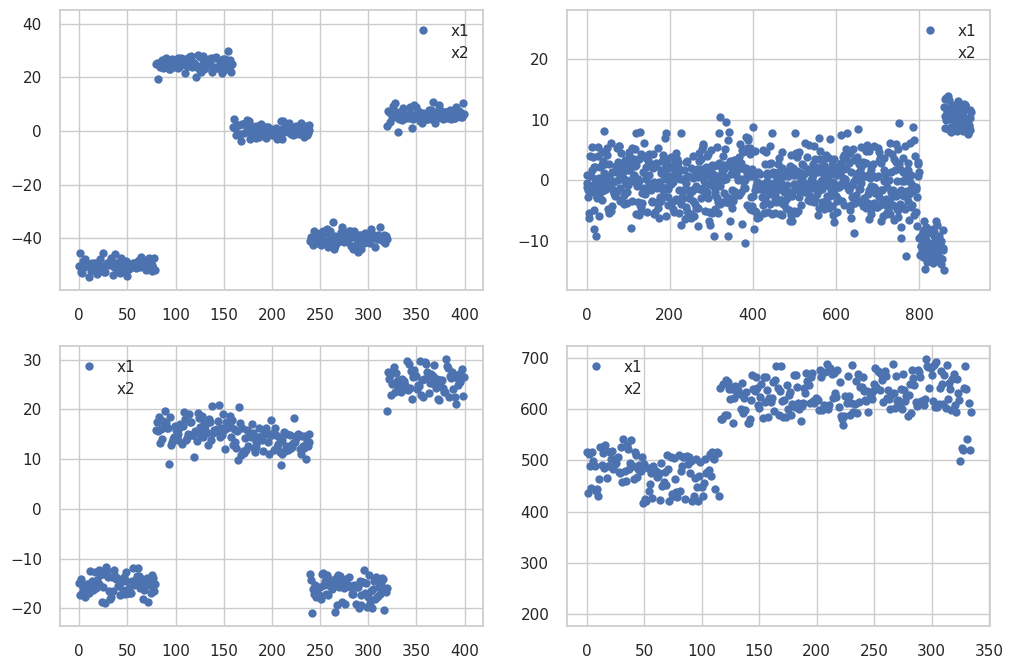

In [355]:
#define number of rows and columns for subplots
nrow=2
ncol=2

# make a list of all dataframes 
df_list = [compact_df ,skewed_df, subclusters_df, wellSeparated_df]
fig, axes = plt.subplots(nrow, ncol, figsize=(12, 8))

# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot(ax=axes[r,c], style=['o','rx'])
        count+=1

----

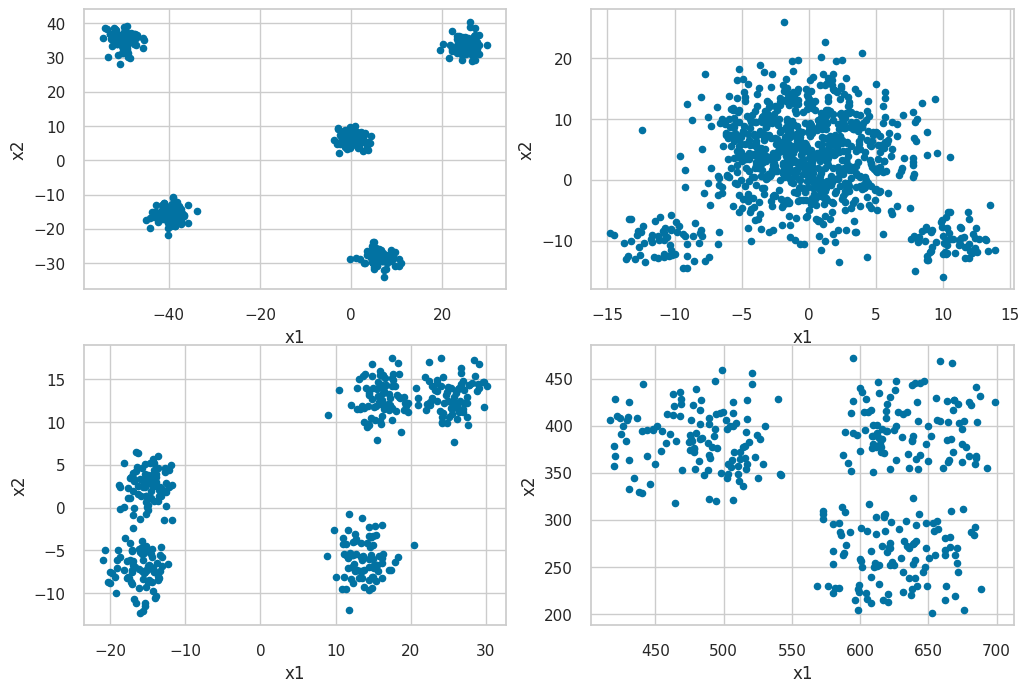

In [356]:
#define number of rows and columns for subplots
nrow=2
ncol=2

# make a list of all dataframes 
df_list = [compact_df ,skewed_df, subclusters_df, wellSeparated_df]
fig, axes = plt.subplots(nrow, ncol, figsize=(12, 8))

# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot(x='x1', y='x2', kind="scatter", ax=axes[r][c])
        count+=1

----

### **3. KMeans**

In [357]:
# Let's Implement elbow method from scratch
def elbow(X, init_method):
    # Let's Perform K-means clustering with certain values of K. 
    # For each value of K, let's compute the average distance to the centroid across all the data points
    mean_dist = []
    K = range(1,10)
    for k in K:
        kmean_model = KMeans(n_clusters=k, init=init_method).fit(X)
        kmean_model.fit(X)
        mean_dist.append(sum(np.min(cdist(X, kmean_model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

    for i in range(0, len(mean_dist)):
        print(f" For k {i}: value is {mean_dist[i]}")

    # Let's Plot the elbow curve
    plt.plot(K, mean_dist, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('Elbow Method For Optimal k')
    plt.show()

In [358]:
#Let's Implement silhouette method from scratch
def silhouette(X, init_method):
    mean_sil = []
    range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

    for k in range_n_clusters:
        kmeans = KMeans(n_clusters = k, init=init_method).fit(X)
        labels = kmeans.labels_
        mean_sil.append(silhouette_score(X, labels, metric = 'euclidean'))

    plt.plot(range_n_clusters,mean_sil,'bx-')
    plt.xlabel('k')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette Method For Optimal k')
    plt.show()

In [359]:
# Let's Visualize the clusters formed by Kmeans.
def visualize_clusters(dataframe, no_of_clusters):
    # Initialize the class object
    kmeans = KMeans(n_clusters= no_of_clusters)

    # Predict the labels of clusters.
    label = kmeans.fit_predict(dataframe)

    # Getting the Centroids
    centroids = kmeans.cluster_centers_

    # Getting unique labels
    u_labels = np.unique(label)

    # Plotting the results:
    for i in u_labels:
        plt.scatter(dataframe[label == i , 0] , dataframe[label == i , 1] , label = i)
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
    plt.legend()
    plt.show()

In [360]:
# Normalize the data
compact_df = StandardScaler().fit_transform(compact_df[['x1', 'x2']])
# compact_df

 For k 0: value is 1.329198825824042
 For k 1: value is 0.9864546402526373
 For k 2: value is 0.6337261825907338
 For k 3: value is 0.3315185182964698
 For k 4: value is 0.0919941365895952
 For k 5: value is 0.08734631793395665
 For k 6: value is 0.08281049331800641
 For k 7: value is 0.07921696006055344
 For k 8: value is 0.07526053768537529


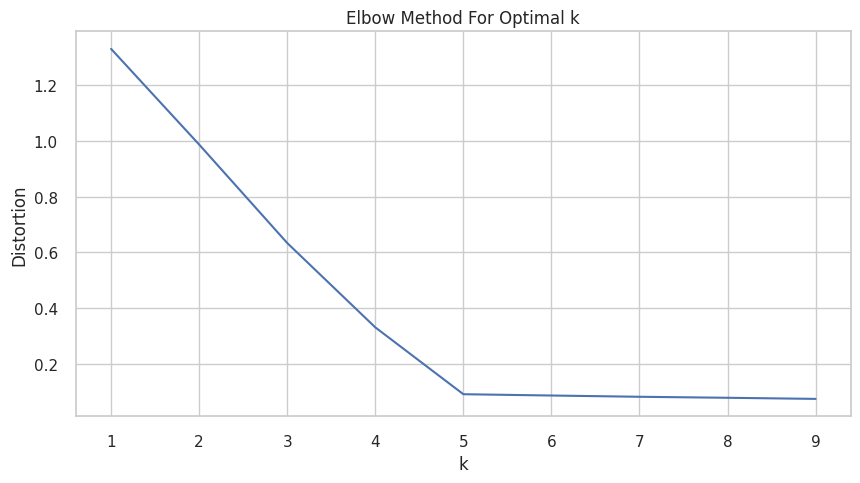

In [361]:
# Find optimal number of clusters using Elbow method
elbow(compact_df, "k-means++")

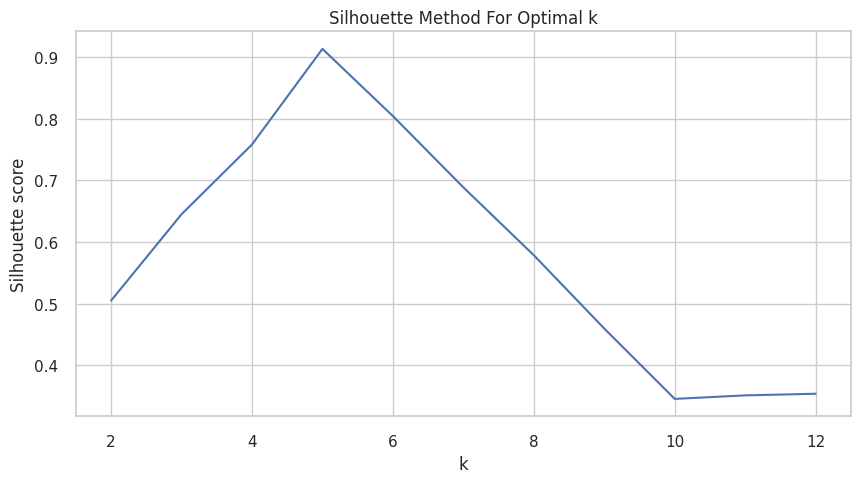

In [362]:
silhouette(compact_df, "k-means++")

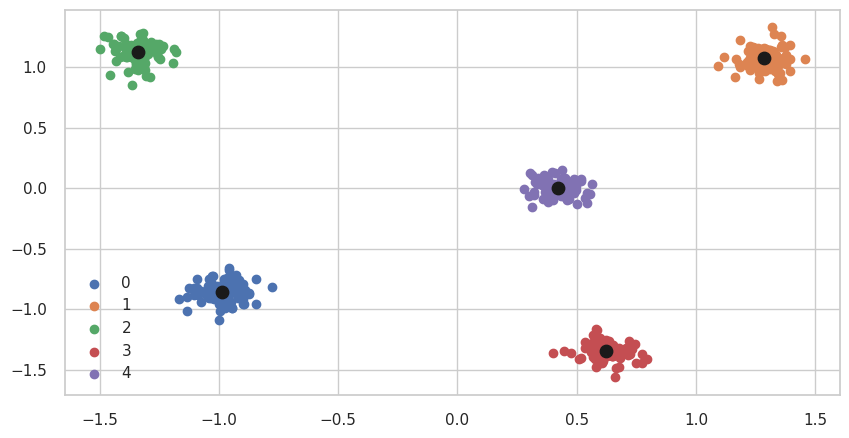

In [363]:
# Visualize the clusters using the optimal number found via Elbow method
visualize_clusters(compact_df, 5)

----

In [364]:
skewed_df = StandardScaler().fit_transform(skewed_df[['x1', 'x2']])
# skewed_df

 For k 0: value is 1.1978846461584474
 For k 1: value is 0.9859328077300138
 For k 2: value is 0.8324863817821883
 For k 3: value is 0.696690279624228
 For k 4: value is 0.5914417515924517
 For k 5: value is 0.5264520903753467
 For k 6: value is 0.4820704930120927
 For k 7: value is 0.44756929260935896
 For k 8: value is 0.41921803781500583


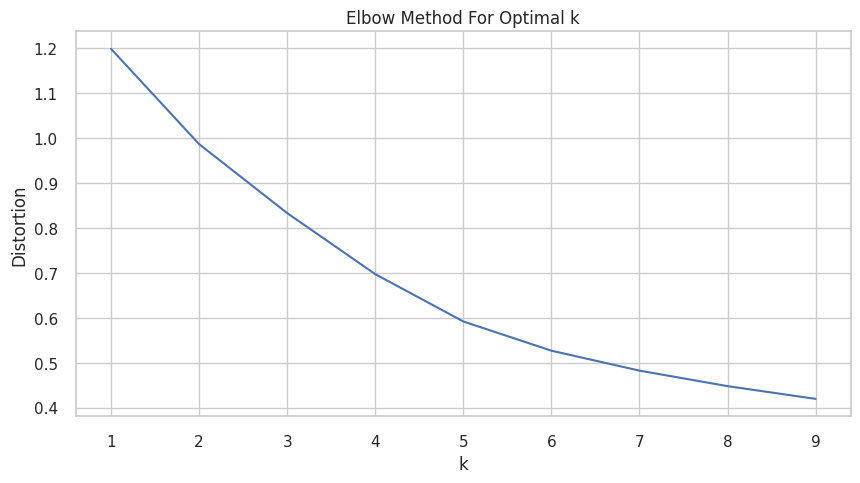

In [365]:
elbow(skewed_df, "k-means++")

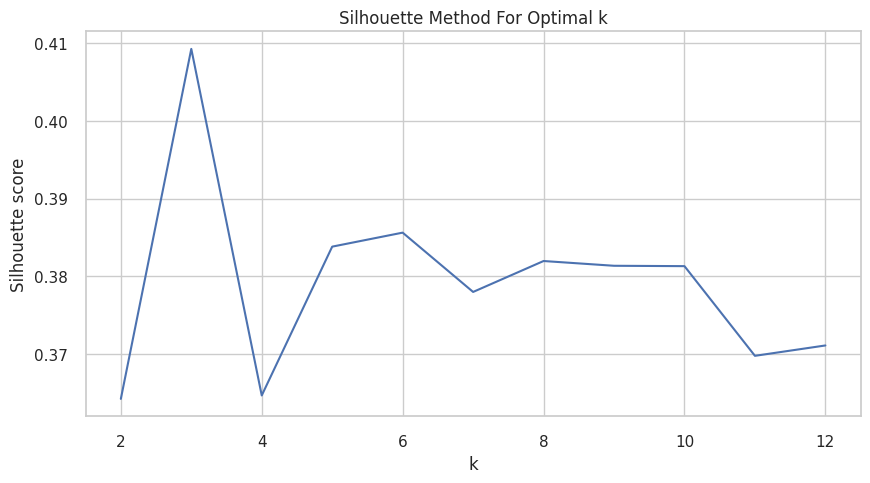

In [366]:
silhouette(skewed_df, "k-means++")

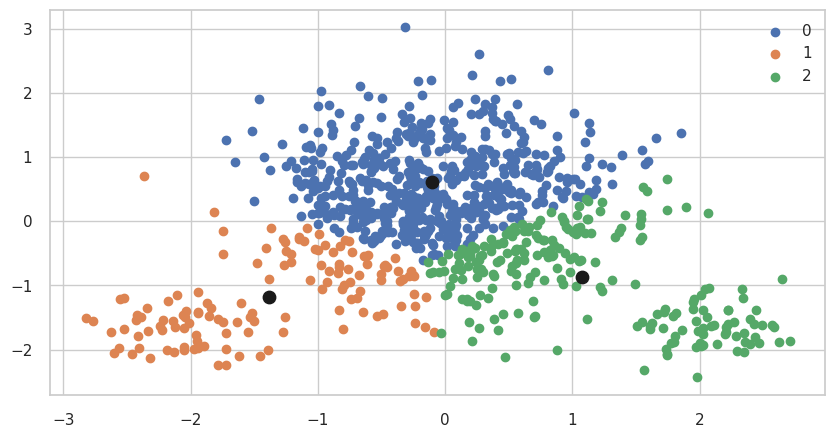

In [368]:
visualize_clusters(skewed_df, 3)

----

In [369]:
subclusters_df = StandardScaler().fit_transform(subclusters_df[['x1', 'x2']])

 For k 0: value is 1.3832376750004516
 For k 1: value is 0.7038379687231631
 For k 2: value is 0.41172525913075214
 For k 3: value is 0.27106744701236274
 For k 4: value is 0.21931678260409795
 For k 5: value is 0.20486980589529288
 For k 6: value is 0.19091505636035966
 For k 7: value is 0.17960196998534034
 For k 8: value is 0.16743232678309547


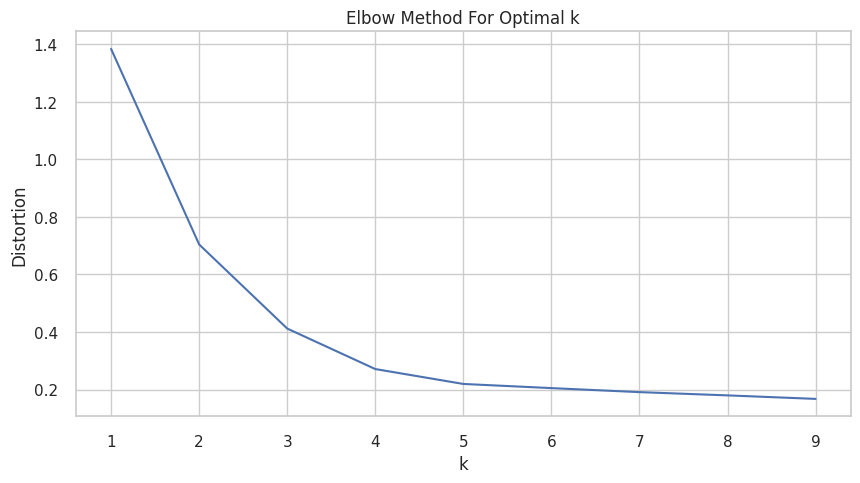

In [370]:
elbow(subclusters_df, "k-means++")

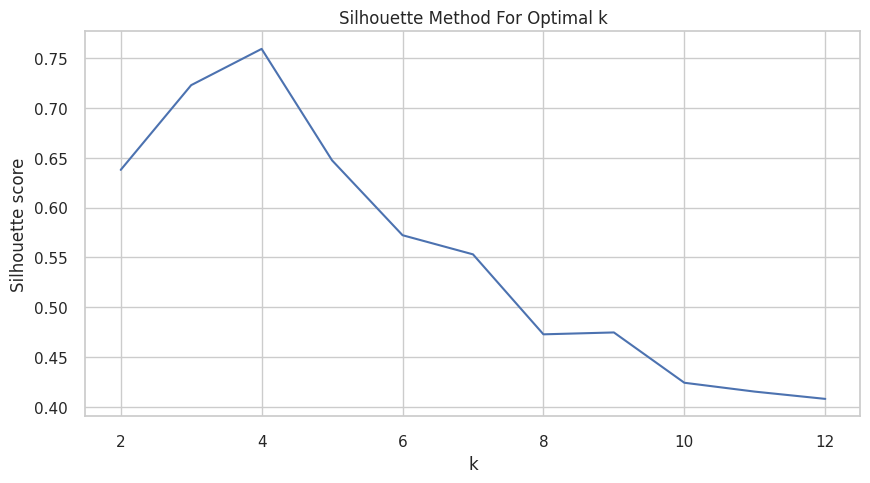

In [371]:
silhouette(subclusters_df, "k-means++")

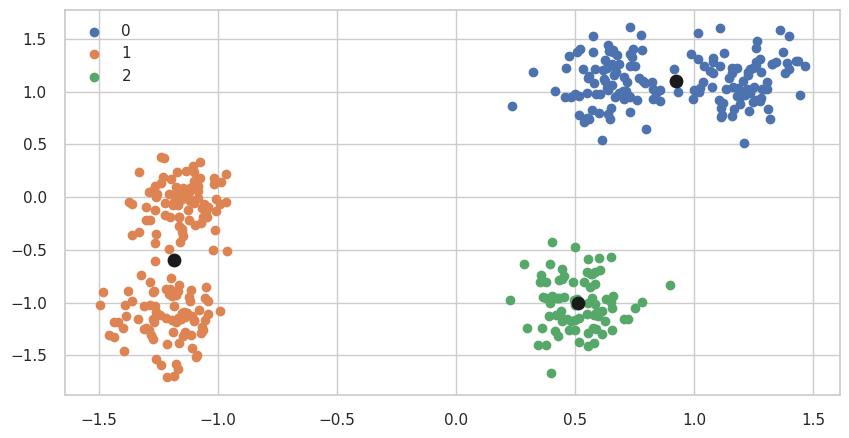

In [372]:
visualize_clusters(subclusters_df, 3)

----

In [373]:
wellSeparated_df = StandardScaler().fit_transform(wellSeparated_df[['x1', 'x2']])

 For k 0: value is 1.3418177889667882
 For k 1: value is 0.8919143023578265
 For k 2: value is 0.5413871605474102
 For k 3: value is 0.4964399492060951
 For k 4: value is 0.45428705760462207
 For k 5: value is 0.41608282685481035
 For k 6: value is 0.3869915369201645
 For k 7: value is 0.3601189631958904
 For k 8: value is 0.33510903260435904


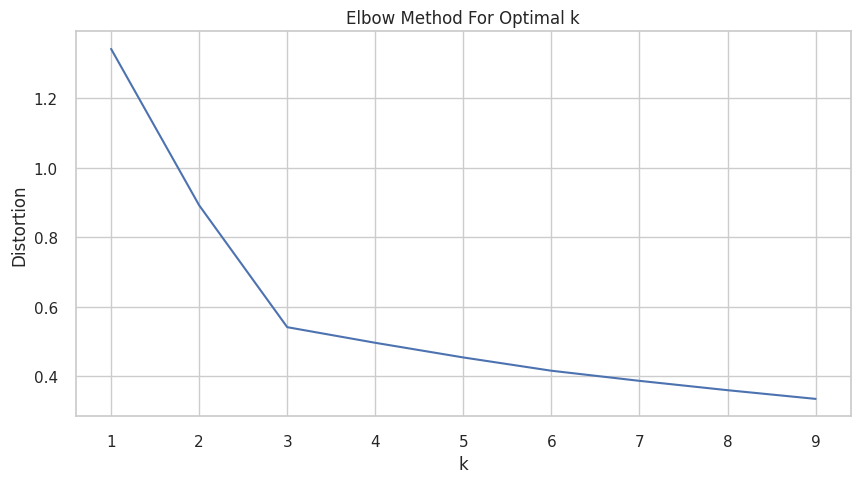

In [374]:
elbow(wellSeparated_df, "k-means++")

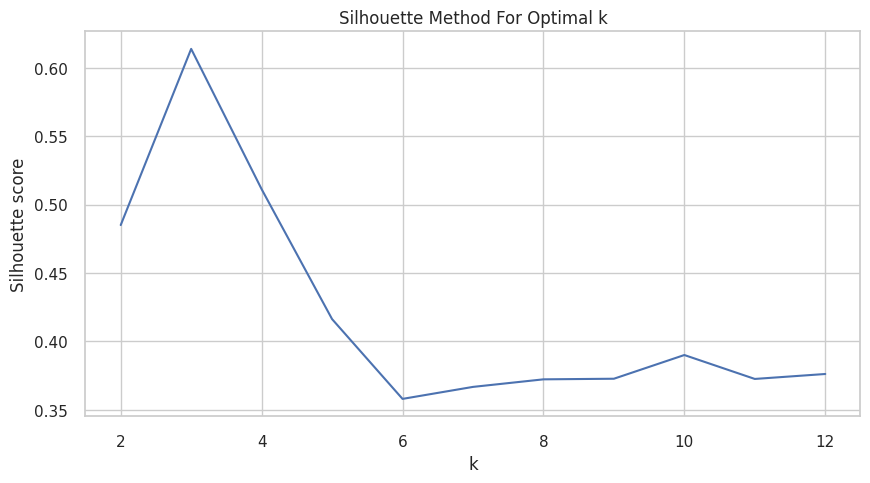

In [375]:
silhouette(wellSeparated_df, "k-means++")

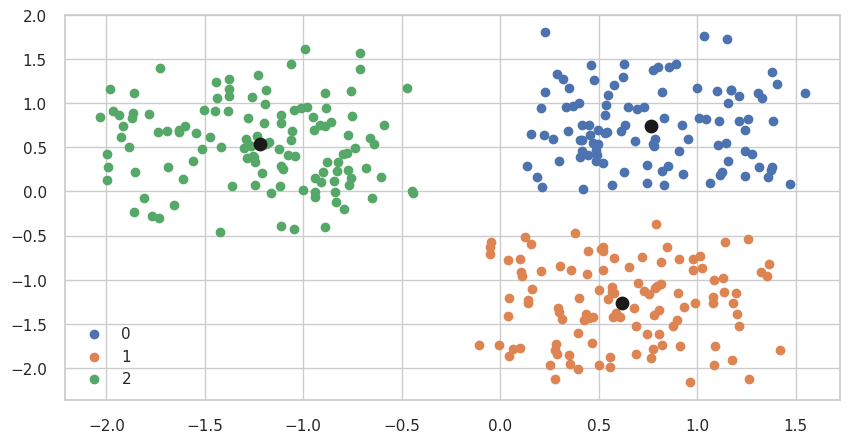

In [376]:
visualize_clusters(wellSeparated_df, 3)

----

### **3. Agglomerative Clustering**
    Hierarchical Clustering

In [389]:
# Let's implement hierarchical clustering

# Now, we can use optimal k (from dendogram) in Hierarchical clustering to get the cluster labels

def hierarchical_clustering(X, linkage_name, optimal_k):

    cluster_model = AgglomerativeClustering(n_clusters=optimal_k, affinity='euclidean', linkage=linkage_name)
    cluster_model = cluster_model.fit(X)
    cluster_model.labels_

    '''
    we need to create an AgglomerativeClustering object, and in it, we pass the following parameters:
    n_cluster= optimal_k, the number of clusters our model should return
    affinity = euclidean, specify metric to be used to calculate distances
    linkage= Single/Complete to regulate how distance calculation will be carried out between different clusters.
    '''
    Agg_hc = AgglomerativeClustering(n_clusters = optimal_k, affinity = 'euclidean', linkage = linkage_name)
    y_hc = Agg_hc.fit_predict(X) # model fitting on the dataset

    # plotting cluster 1
    plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
    plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
    plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
    plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
    plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
    plt.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 100, c = 'orange', label = 'Cluster 6')
    
    # plot title addition
    plt.title('Clusters')
    # labelling the x-axis
    plt.xlabel('')
    # label of the y-axis
    plt.ylabel('')
    # printing the legend
    plt.legend()
    # show the plot
    plt.show()

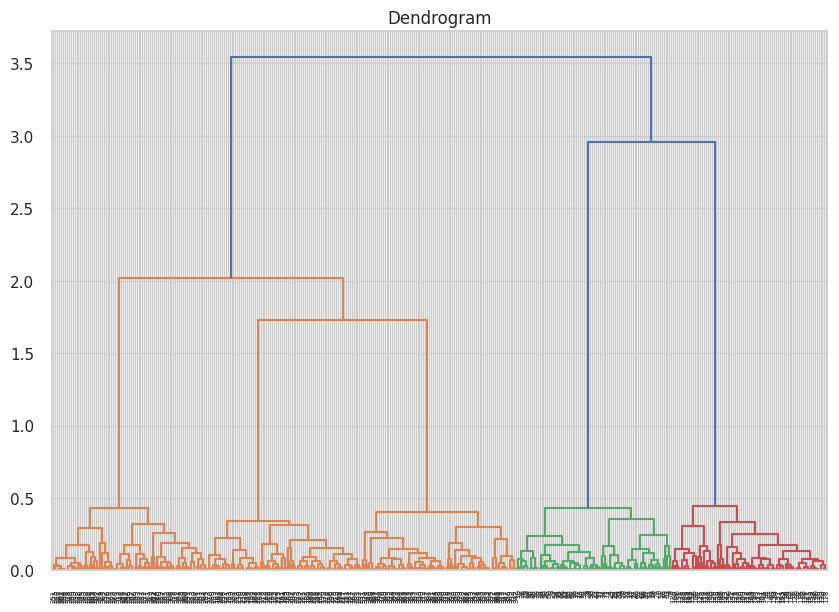

In [388]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(compact_df, method='complete'))
# suggests 3 clusters

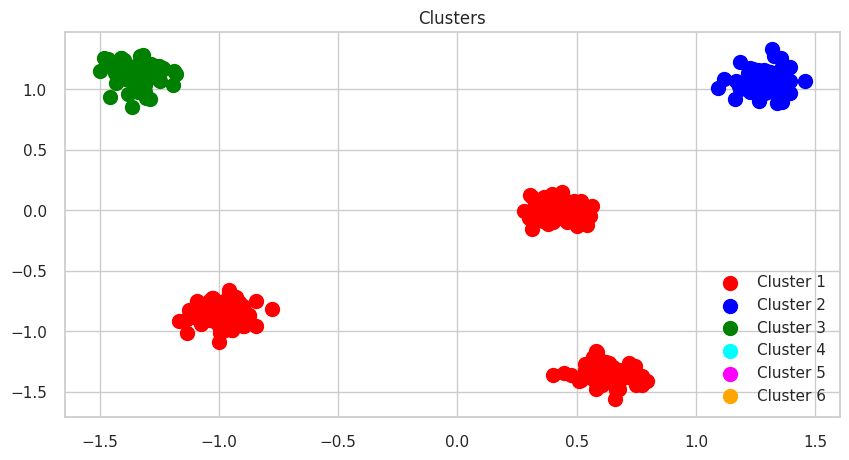

In [390]:
hierarchical_clustering(compact_df, 'complete', 3)

----

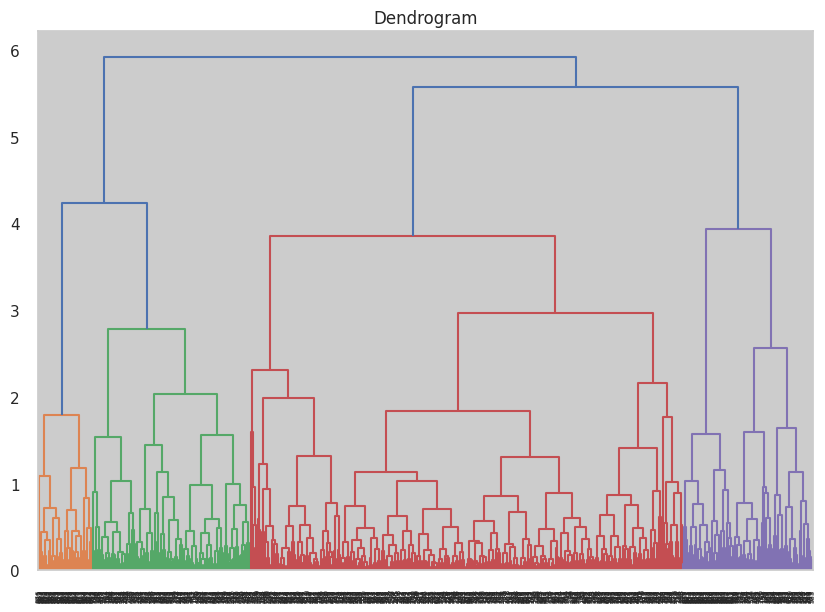

In [391]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(skewed_df, method='complete'))

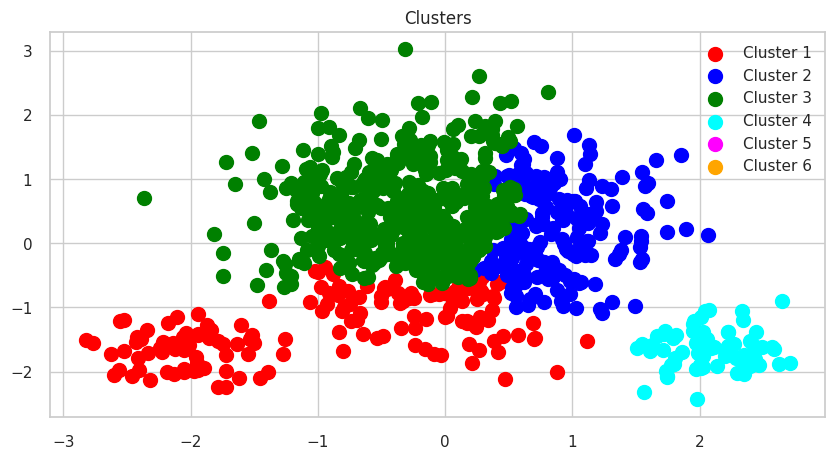

In [392]:
hierarchical_clustering(skewed_df, 'complete', 4)

----

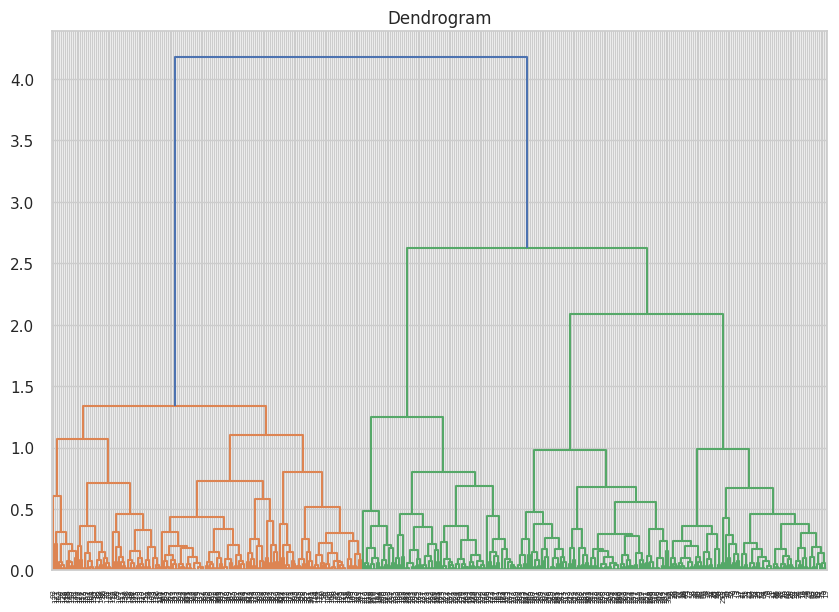

In [393]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(subclusters_df, method='complete'))

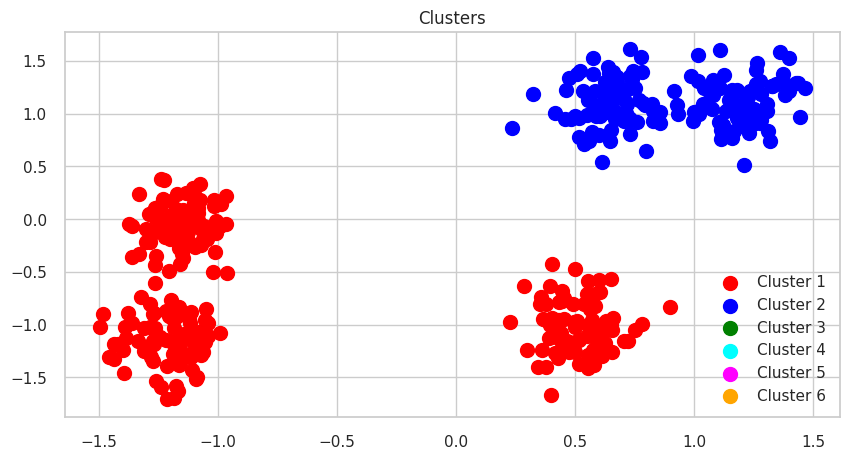

In [394]:
hierarchical_clustering(subclusters_df, 'complete', 2)

----

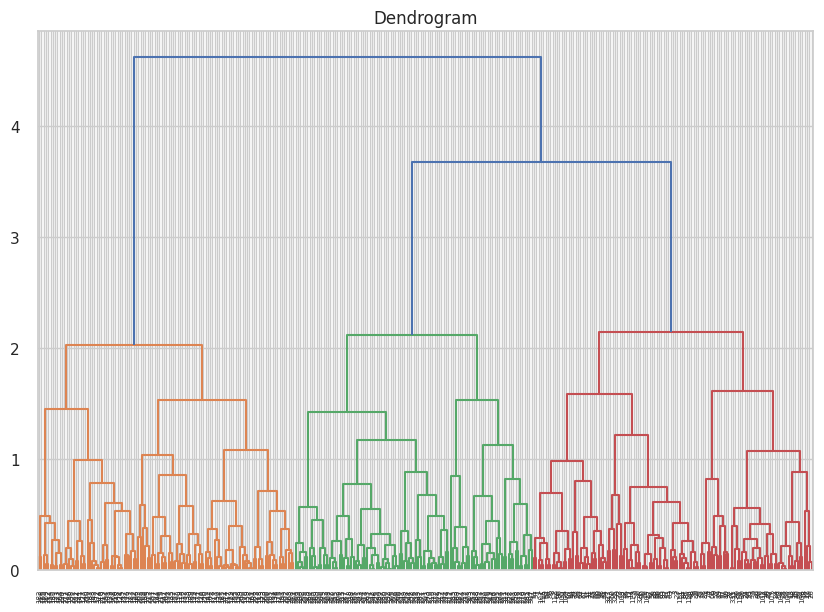

In [395]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(wellSeparated_df, method='complete'))

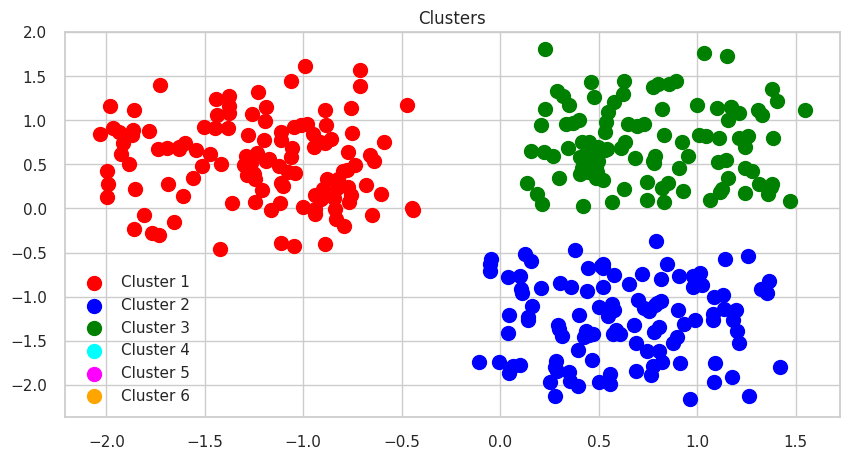

In [397]:
hierarchical_clustering(wellSeparated_df, 'complete', 3)

----

### **4. DBSCAN Clustering**

In [401]:
# Numpy array of all the cluster labels assigned to each data point 
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(compact_df) 
labels = db_default.labels_ 

In [ ]:
# Building the label to colour mapping 
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
  
# For the construction of the legend of the plot 
r = plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
g = plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
b = plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k')

# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
  
# Building the legend 
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1')) 
  
plt.show() 